In [1]:
# === Patch scikit-learn for faster processing ===
%pip install -q scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

# === Set up project root ===
import sys
from pathlib import Path

project_root = Path().resolve()
while not (project_root / 'src').exists() and project_root != project_root.parent:
    project_root = project_root.parent
sys.path.append(str(project_root))
print("Project root set to:", project_root)

# === Imports ===
import pandas as pd
import joblib
import numpy as np
from src.train_on_manual_entry_features import train_final_manual_models


Note: you may need to restart the kernel to use updated packages.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Project root set to: C:\Users\jonat\fraud-detection-project


In [2]:

# === Paths ===
processed_dir = project_root / "data" / "processed"
model_dir = project_root / "models" / "trained_model_manual_fields"
model_dir.mkdir(parents=True, exist_ok=True)


In [3]:

# === Load Data ===
feature_columns = joblib.load(processed_dir / "feature_columns.pkl")
print("Loaded feature column names:", feature_columns[:6], "...")

X = pd.read_csv(processed_dir / "X_smote.csv", header=0)
X.columns = feature_columns

y = pd.read_csv(processed_dir / "y_smote.csv", header=0).squeeze("columns")
y = pd.to_numeric(y, errors="coerce").dropna().astype(int).reset_index(drop=True)


Loaded feature column names: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5'] ...


In [4]:

# Adjust shapes just in case
min_len = min(len(X), len(y))
X = X.iloc[:min_len].reset_index(drop=True)
y = y.iloc[:min_len].reset_index(drop=True)

print("Adjusted shapes for consistency:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Adjusted shapes for consistency:
X shape: (1139754, 357)
y shape: (1139754,)


In [5]:

# === Extract frontend-compatible manual fields (post-encoding) ===
manual_fields = ["TransactionAmt", "card1", "addr1", "dist1", "ProductCD_freq", "P_emaildomain_freq"]
X_manual = X[manual_fields].copy()



>>> Training RandomForest on full dataset...
Classification Report (full data):
              precision    recall  f1-score   support

           0     0.9660    0.9717    0.9688    569877
           1     0.9716    0.9658    0.9687    569877

    accuracy                         0.9688   1139754
   macro avg     0.9688    0.9688    0.9688   1139754
weighted avg     0.9688    0.9688    0.9688   1139754

ROC AUC: 0.9957703055562824

>>> Training XGBoost on full dataset...


c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:49:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (full data):
              precision    recall  f1-score   support

           0     0.8849    0.9177    0.9010    569877
           1     0.9145    0.8806    0.8973    569877

    accuracy                         0.8992   1139754
   macro avg     0.8997    0.8992    0.8991   1139754
weighted avg     0.8997    0.8992    0.8991   1139754

ROC AUC: 0.9624033779007342

>>> Training LogisticRegression on full dataset...
Classification Report (full data):
              precision    recall  f1-score   support

           0     0.6396    0.7322    0.6828    569877
           1     0.6869    0.5874    0.6333    569877

    accuracy                         0.6598   1139754
   macro avg     0.6632    0.6598    0.6580   1139754
weighted avg     0.6632    0.6598    0.6580   1139754

ROC AUC: 0.6936993304975229

>>> Training GradientBoosting on full dataset...
Classification Report (full data):
              precision    recall  f1-score   support

           0     0.7761    0

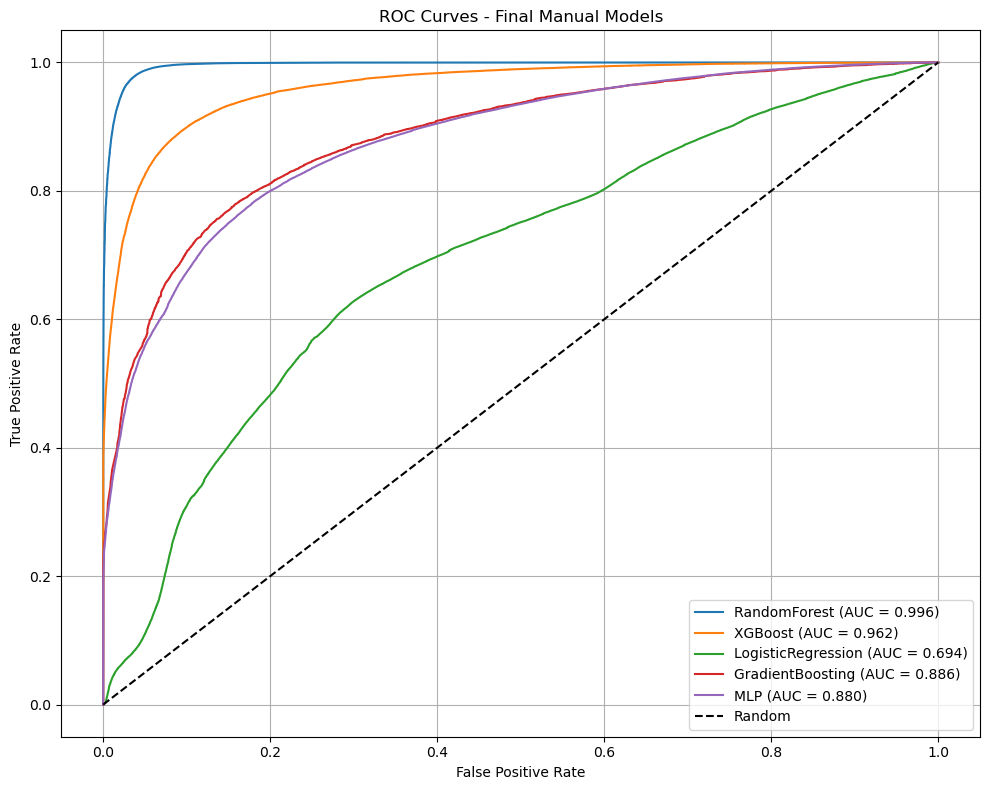

In [6]:

# === Train Models ===
train_final_manual_models(X_manual, y, save_dir=model_dir)
